In [ ]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=27aede3b570304a308d78348257ba69421d2a974803b9ab77010d29848594b88
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from word2number import w2n


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Futura Labs/Machine Learning/trecking data.csv')

In [ ]:
data

,Unnamed: 0,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...,...
403,403,14,Team,NaN,No,No,Homely food,Yes,Rainy,No,two
404,404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [ ]:
data.dtypes

Unnamed: 0                 int64
age                        int64
solo/team                 object
M/F                       object
Are you smoker            object
jeep_service              object
food_habit                object
exercise                  object
climate                   object
status                    object
Nomber of team members    object
dtype: object

In [ ]:
data.isna().sum()

Unnamed: 0                0
age                       0
solo/team                 3
M/F                       4
Are you smoker            1
jeep_service              1
food_habit                3
exercise                  0
climate                   0
status                    0
Nomber of team members    2
dtype: int64

In [ ]:
data["solo/team"]=data["solo/team"].fillna(method="bfill")
data["M/F"]=data["M/F"].fillna(method="bfill")
data["Are you smoker"]=data["Are you smoker"].fillna(method="bfill")
data["jeep_service"]=data["jeep_service"].fillna(method="bfill")
data["food_habit"]=data["food_habit"].fillna(method="bfill")
data["Nomber of team members"]=data["Nomber of team members"].fillna(method="bfill")



In [ ]:
data

,Unnamed: 0,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...,...
403,403,14,Team,Male,No,No,Homely food,Yes,Rainy,No,two
404,404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [ ]:
data.isna().sum()

Unnamed: 0                0
age                       0
solo/team                 0
M/F                       0
Are you smoker            0
jeep_service              0
food_habit                0
exercise                  0
climate                   0
status                    0
Nomber of team members    0
dtype: int64

In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,Team,Male,Yes,No,Fast food,Yes,Rainy,Yes,four
1,24,Team,Male,Yes,No,Homely food,No,Rainy,Yes,four
2,23,Team,Male,No,No,Fast food,Yes,Rainy,Yes,four
3,25,Team,Male,No,No,Fast food,No,Rainy,Yes,four
4,22,Team,Female,No,No,Homely food,No,Rainy,Yes,two
...,...,...,...,...,...,...,...,...,...,...
403,14,Team,Male,No,No,Homely food,Yes,Rainy,No,two
404,15,Solo,Male,Yes,No,Homely food,No,Rainy,No,one
405,16,Solo,Male,Yes,Yes,Fast food,Yes,Rainy,Yes,one
406,17,Solo,Male,Yes,No,Fast food,No,Rainy,No,one


In [ ]:
data['food_habit'].unique()

array(['Fast food', 'Homely food'], dtype=object)

In [ ]:
data['climate'].unique()

array(['Rainy', 'Hot'], dtype=object)

In [ ]:
data['Nomber of team members'].unique()

array(['four', 'two', 'tree', 'five', 'one', 'unkown', 'eight'],
      dtype=object)

In [ ]:
le=LabelEncoder()

In [ ]:
data['solo/team']=le.fit_transform(data['solo/team'])
data['M/F']=le.fit_transform(data['M/F'])
data['Are you smoker']=le.fit_transform(data['Are you smoker'])
data['jeep_service']=le.fit_transform(data['jeep_service'])
data['food_habit']=le.fit_transform(data['food_habit'])
data['exercise']=le.fit_transform(data['exercise'])
data['climate']=le.fit_transform(data['climate'])
data['status']=le.fit_transform(data['status'])




In [ ]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,four
1,24,1,1,1,0,1,0,1,1,four
2,23,1,1,0,0,0,1,1,1,four
3,25,1,1,0,0,0,0,1,1,four
4,22,1,0,0,0,1,0,1,1,two
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,two
404,15,0,1,1,0,1,0,1,0,one
405,16,0,1,1,1,0,1,1,1,one
406,17,0,1,1,0,0,0,1,0,one


In [ ]:
data['Nomber of team members'].unique()

array(['four', 'two', 'tree', 'five', 'one', 'unkown', 'eight'],
      dtype=object)

In [ ]:
data["Nomber of team members"]=data["Nomber of team members"].replace({"unkown":"zero","tree":"three"})

In [ ]:
data['Nomber of team members']=data['Nomber of team members'].apply(w2n.word_to_num)

In [ ]:
data['Nomber of team members'].unique()

array([4, 2, 3, 5, 1, 0, 8])

In [ ]:
data

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,status,Nomber of team members
0,23,1,1,1,0,0,1,1,1,4
1,24,1,1,1,0,1,0,1,1,4
2,23,1,1,0,0,0,1,1,1,4
3,25,1,1,0,0,0,0,1,1,4
4,22,1,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,0,2
404,15,0,1,1,0,1,0,1,0,1
405,16,0,1,1,1,0,1,1,1,1
406,17,0,1,1,0,0,0,1,0,1


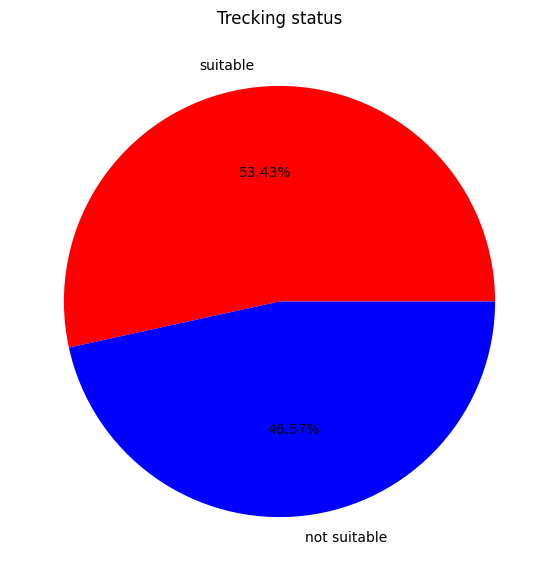

In [ ]:
plt.figure(figsize=(7,7))
Col=['red','blue']
plt.pie(data["status"].value_counts().values,colors=Col,labels=["suitable","not suitable"],autopct="%.2f%%",)
plt.title("Trecking status")
plt.show()



In [ ]:
x=data.drop('status',axis=1)
y=data['status']

In [ ]:
x

,age,solo/team,M/F,Are you smoker,jeep_service,food_habit,exercise,climate,Nomber of team members
0,23,1,1,1,0,0,1,1,4
1,24,1,1,1,0,1,0,1,4
2,23,1,1,0,0,0,1,1,4
3,25,1,1,0,0,0,0,1,4
4,22,1,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...
403,14,1,1,0,0,1,1,1,2
404,15,0,1,1,0,1,0,1,1
405,16,0,1,1,1,0,1,1,1
406,17,0,1,1,0,0,0,1,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    1
406    0
407    1
Name: status, Length: 408, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
svc_model=SVC()

In [ ]:
gscv=GridSearchCV(svc_model,{'gamma' : ['auto','scale'],'C':[1,5,10,20],
                            'kernel':['linear','rbf','poly','sigmoid']},
                  cv=5,return_train_score=True)

In [ ]:
gscv.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             return_train_score=True)

In [ ]:
gs_data=gscv.cv_results_

In [ ]:
data=pd.DataFrame(gs_data)

In [ ]:
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027615,0.004911,0.001980,0.000080,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.719512,0.743902,...,0.725504,0.026326,21,0.760736,0.760736,0.754601,0.770642,0.807339,0.770811,0.018974
1,0.004314,0.000118,0.002197,0.000118,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.792683,0.853659,...,0.867721,0.048326,11,0.953988,0.941718,0.941718,0.926606,0.944954,0.941797,0.008825
2,14.978019,4.852993,0.002410,0.000347,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.914634,0.914634,...,0.921530,0.014852,1,0.990798,0.990798,0.984663,0.981651,0.984709,0.986524,0.003661
3,0.004660,0.000151,0.002132,0.000062,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.536585,0.536585,...,0.534297,0.002803,27,0.533742,0.533742,0.533742,0.535168,0.535168,0.534313,0.000699
4,0.027245,0.003702,0.002390,0.000720,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.719512,0.743902,...,0.725504,0.026326,21,0.760736,0.760736,0.754601,0.770642,0.807339,0.770811,0.018974


In [ ]:
gscv.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
gscv.best_score_

0.9215296597410418

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_params={'svm':{'model':SVC(gamma='auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}},
              'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10,30]}},
              'logistic_regression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}},
              'decisiontree_classifier':{'model':DecisionTreeClassifier(),'params':{'max_depth': [5, 10, 15]}}}

In [ ]:
scores=[]
models=['svm','random_forest','logistic_regression','decisiontree_classifier']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})


In [ ]:
scores

[{'model': 'svm',
  'best_score': 0.914333032219211,
  'best_params': {'C': 20, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9020174646190906,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.6788919000301114,
  'best_params': {'C': 10}},
 {'model': 'decisiontree_classifier',
  'best_score': 0.8996988858777476,
  'best_params': {'max_depth': 5}}]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=20)

In [ ]:
model=SVC(C=20)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8872549019607843

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
pd.DataFrame({'true value':y_test,'predicted value':y_pred})

,true value,predicted value
10,1,1
283,0,0
148,0,0
200,0,0
47,1,1
...,...,...
66,1,1
286,1,1
44,1,1
80,0,0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[94, 14],
       [ 9, 87]])

In [ ]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'predicted value')

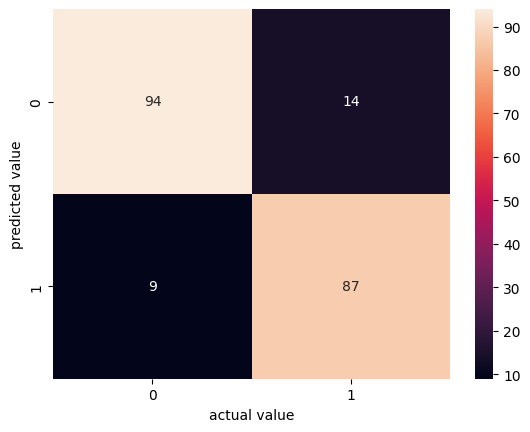

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')

In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import  AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x=data.drop("status",axis=1)
y=data["status"]


In [ ]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
rf_score=cross_val_score(RandomForestClassifier(),X=x,y=y)
dt_score=cross_val_score(DecisionTreeClassifier(),X=x,y=y)
svc_score=cross_val_score(SVC(),X=x,y=y)
Ab_score=cross_val_score(AdaBoostClassifier(),X=x,y=y)
Gb_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y)
XGB_score=cross_val_score(XGBClassifier(),X=x,y=y)
knn_score=cross_val_score(KNeighborsClassifier(),X=x,y=y)
Nb_score=cross_val_score(GaussianNB(),X=x,y=y)

In [ ]:
print(log_score)
print(rf_score)
print(dt_score)
print(svc_score)
print(Ab_score)
print(Gb_score)
print(XGB_score)
print(knn_score)
print(Nb_score)

[0.68292683 0.7195122  0.63414634 0.72839506 0.60493827]
[0.8902439  0.8902439  0.92682927 0.91358025 0.91358025]
[0.87804878 0.87804878 0.91463415 0.92592593 0.91358025]
[0.79268293 0.7804878  1.         0.90123457 0.82716049]
[0.91463415 0.92682927 0.96341463 1.         0.97530864]
[0.92682927 0.91463415 0.91463415 0.95061728 0.9382716 ]
[0.92682927 0.91463415 0.93902439 0.96296296 0.91358025]
[0.79268293 0.86585366 0.98780488 0.9382716  0.83950617]
[0.7804878  0.74390244 0.80487805 0.71604938 0.72839506]


In [ ]:
print(np.mean(log_score))
print(np.mean(rf_score))
print(np.mean(dt_score))
print(np.mean(svc_score))
print(np.mean(Ab_score))
print(np.mean(Gb_score))
print(np.mean(XGB_score))
print(np.mean(knn_score))
print(np.mean(Nb_score))

0.6739837398373985
0.9068955133995784
0.9020475760313159
0.8603131586871424
0.9560373381511592
0.9289972899728998
0.9314062029509182
0.8848238482384824
0.7547425474254743
